In [1]:
import pandas as pd
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline(connected=True)

In [143]:
train = pd.read_csv('./Titanic/train.csv')
test = pd.read_csv('./Titanic/test.csv')

### Feature Engineering: Feature Transformation

### 1. 합치기

In [144]:
ntrain = train.shape[0]
ntest = test.shape[0]
df = pd.concat((train, test))

In [145]:
ntest

418

In [146]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df.shape

(1309, 12)

### 2. Sex 숫자 변환

In [148]:
df['Sex'].isnull().sum()

0

In [149]:
gender = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(gender)

### 3. Pclass 는 변경할 필요 없음
- Pclass 값이 1, 2, 3

### 4. Embarked 정보를 숫자로 바꾸기

In [150]:
df['Embarked'].isnull().sum()

2

In [151]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [152]:
df.loc[(df['Embarked'].isnull()),'Embarked'] = 'S'

In [153]:
df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [154]:
df_temp1 = df.copy()
embarked = {'S': 0, "C": 1, "Q": 2}
df_temp1['Embarked'] = df_temp1['Embarked'].map(embarked)
df['Embarked'] = df['Embarked'].map(embarked)

In [155]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


### 참고: pandas.factorize( -> 결측치는 -1로 대체됨.
- 데이터의 범주가 많아서, 일일이 각 데이터를 숫자로 기재해주기 어려운 경우에 사용

In [57]:
df_temp2 = df.copy()
df_temp2['Embarked'].factorize()

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 Index(['S', 'C', 'Q'], dtype='object'))

In [58]:
df_temp2['Embarked'].factorize()[0]

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [59]:
df_temp2['Embarked'] = df_temp2['Embarked'].factorize()[0]
df_temp2['Embarked'].value_counts()

0    916
1    270
2    123
Name: Embarked, dtype: int64

### 5. Name

In [156]:
df['Initial'] = df.Name.str.extract('([A-Za-z]+)\.')
df['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Initial, dtype: int64

- Ms. 는 당시에는 귀족 미망인을 의미함
- Mlle나 Mme등도 마드모아젤과 마담의 줄인말로, 귀족 여성을 의미함
- Countess 는 백작 부인을 의미하므로, 귀족 여성을 의미함
- Lady 도 귀족 부인을 의미함

In [157]:
title_mapping = {'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Lady': 4, 'Don': 5, 'Rev': 6, 'Dr': 7,
                 'Major': 8, 'Sir': 9, 'Col': 10,  'Capt': 11, 'Jonkheer': 12}
df['Initial'] = df['Initial'].map(title_mapping)

In [158]:
df.loc[df['Initial'] == 3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0,3.0
16,17,0.0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,2,3.0
50,51,0.0,3,"Panula, Master. Juha Niilo",0,7.0,4,1,3101295,39.6875,NaN,0,3.0
59,60,0.0,3,"Goodwin, Master. William Frederick",0,11.0,5,2,CA 2144,46.9000,NaN,0,3.0
63,64,0.0,3,"Skoog, Master. Harald",0,4.0,3,2,347088,27.9000,NaN,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,1252,NaN,3,"Sage, Master. William Henry",0,14.5,8,2,CA. 2343,69.5500,NaN,0,3.0
379,1271,NaN,3,"Asplund, Master. Carl Edgar",0,5.0,4,2,347077,31.3875,NaN,0,3.0
389,1281,NaN,3,"Palsson, Master. Paul Folke",0,6.0,3,1,349909,21.0750,NaN,0,3.0
392,1284,NaN,3,"Abbott, Master. Eugene Joseph",0,13.0,0,2,C.A. 2673,20.2500,NaN,0,3.0


In [159]:
drop_features = ['Name']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


### 6. Age
- 결측치 보완
- 범위별 숫자 변환

In [160]:
df['Age'].isnull().sum()

263

In [161]:
df.groupby('Initial').agg({'Age' : ['mean', 'median', 'count']})

Age             
              mean median count
Initial                        
0.0      32.252151   29.0   581
1.0      21.774238   22.0   210
2.0      36.994118   35.5   170
3.0       5.482642    4.0    53
4.0      48.000000   48.0     1
5.0      40.000000   40.0     1
6.0      41.250000   41.5     8
7.0      43.571429   49.0     7
8.0      48.500000   48.5     2
9.0      49.000000   49.0     1
10.0     54.000000   54.5     4
11.0     70.000000   70.0     1
12.0     38.000000   38.0     1

In [162]:
df['Age'].fillna(df.groupby("Initial")["Age"].transform("median"), inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,38.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,35.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,35.0,0,0,373450,8.0500,NaN,0,0.0


In [163]:
train = df[:ntrain]
import plotly.express as px
fig = px.violin(train, y='Age', color='Survived', violinmode='overlay')
fig.show()

### 각 나잇대를 숫자로 변경해보기
  - baby (2살 이하): 0
  - child (15살 이하): 1
  - young (20살 이하): 2
  - mid-age (33살 이하): 3
  - junior (43살 이하): 4
  - senior (60살 이하): 5
  - old (75살 이하): 6
  - too old (75살 이상): 7

In [164]:
# 시각화 값에 딱 맞게 설정하는 것은 학습 데이터(train)에만 잘 맞는 overfitting 현상이 발생할 수 있으므로 적절히 적용
df.loc[df['Age'] <= 2, 'Age'] = 0
df.loc[(df['Age'] > 2) & (df['Age'] <= 15), 'Age'] = 1
df.loc[(df['Age'] > 15) & (df['Age'] <= 20), 'Age'] = 2
df.loc[(df['Age'] > 20) & (df['Age'] <= 33), 'Age'] = 3
df.loc[(df['Age'] > 33) & (df['Age'] <= 43), 'Age'] = 4
df.loc[(df['Age'] > 43) & (df['Age'] <= 60), 'Age'] = 5
df.loc[(df['Age'] > 60) & (df['Age'] <= 75), 'Age'] = 6
df.loc[ df['Age'] > 75, 'Age'] = 7

In [165]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,3.0,1,0,A/5 21171,7.2500,NaN,0,0.0
1,2,1.0,1,1,4.0,1,0,PC 17599,71.2833,C85,1,2.0
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1.0
3,4,1.0,1,1,4.0,1,0,113803,53.1000,C123,0,2.0
4,5,0.0,3,0,4.0,0,0,373450,8.0500,NaN,0,0.0


### 7. Fare

In [166]:
survived = train.loc[train['Survived'] == 1]['Fare']
dead = train.loc[train['Survived'] == 0 ]['Fare']
temp = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
temp.head()

,Survived,Dead
1,71.2833,NaN
2,7.9250,NaN
3,53.1000,NaN
8,11.1333,NaN
9,30.0708,NaN


In [167]:
temp.iplot(kind='histogram', bins=(0, 600, 20))

In [168]:
df['Fare'].isnull().sum()

1

In [169]:
# 아무래도 Pclass 에 따라, 요금이 결정될 가능성이 높으므로
df['Fare'].fillna(df.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [170]:
df.loc[ df['Fare'] <= 20, 'Fare'] = 0
df.loc[(df['Fare'] > 20) & (df['Fare'] <= 40), 'Fare'] = 1
df.loc[(df['Fare'] > 40) & (df['Fare'] <= 60), 'Fare'] = 2
df.loc[(df['Fare'] > 60) & (df['Fare'] <= 80), 'Fare'] = 3
df.loc[(df['Fare'] > 80) & (df['Fare'] <= 100), 'Fare'] = 4
df.loc[ df['Fare'] > 100, 'Fare'] = 5

In [42]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0.0,3,0,3.0,1,0,A/5 21171,0.0,NaN,0.0,0.0
1,2,1.0,1,1,4.0,1,0,PC 17599,3.0,C85,1.0,2.0
2,3,1.0,3,1,3.0,0,0,STON/O2. 3101282,0.0,NaN,0.0,1.0
3,4,1.0,1,1,4.0,1,0,113803,2.0,C123,0.0,2.0
4,5,0.0,3,0,4.0,0,0,373450,0.0,NaN,0.0,0.0


### 8. SibSp + Parch
- EDA 를 통해, SibSp 와 Parch 를 별도로 구분할 때보다, 합쳤을 때, 보다 경향성이 보였으므로, 합치기로 함

In [171]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

drop_features = ['SibSp', 'Parch']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family
0,1,0.0,3,0,3.0,A/5 21171,0.0,NaN,0,0.0,2
1,2,1.0,1,1,4.0,PC 17599,3.0,C85,1,2.0,2
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,NaN,0,1.0,1
3,4,1.0,1,1,4.0,113803,2.0,C123,0,2.0,2
4,5,0.0,3,0,4.0,373450,0.0,NaN,0,0.0,1


### 9. Cabin

<AxesSubplot: >

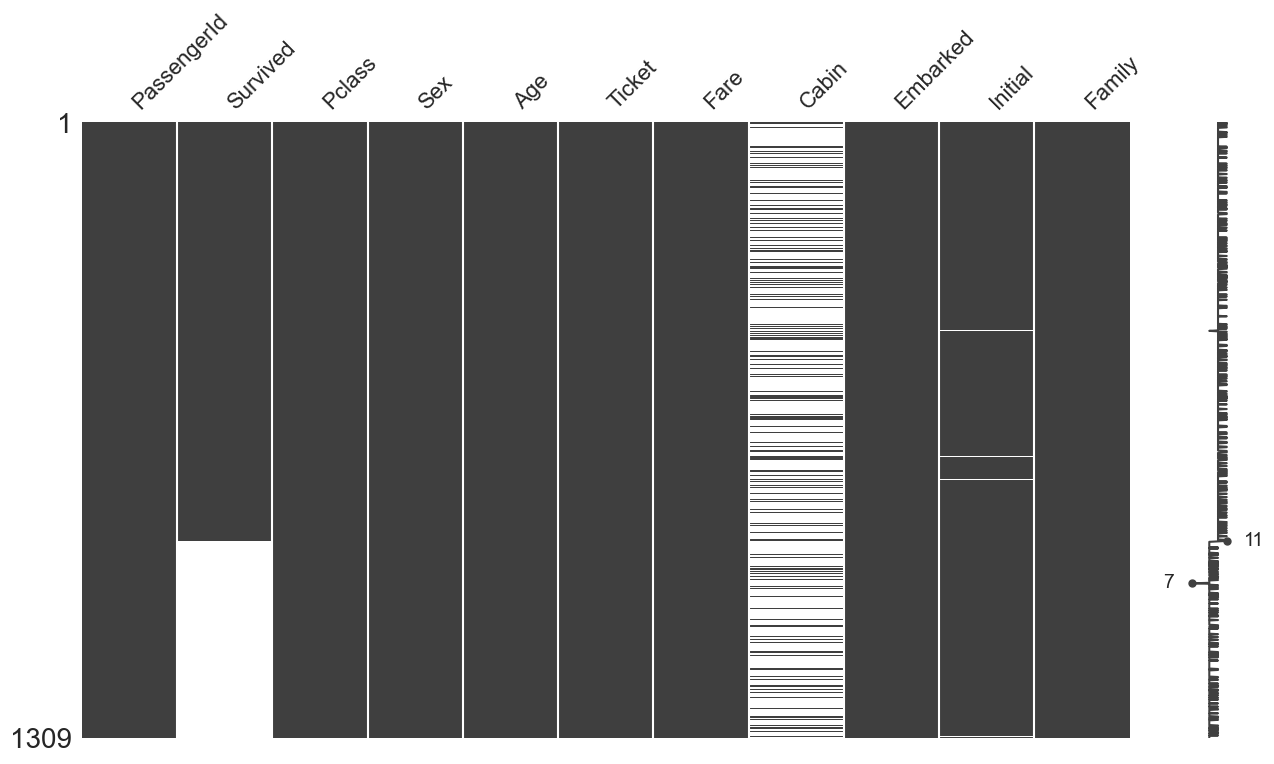

In [172]:
import missingno
missingno.matrix(df, figsize = (15,8))

In [173]:
df['Cabin'].unique() # level 값 확인

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [174]:
df['Cabin'] = df['Cabin'].fillna('U')  # Unknown 의 약자로 U 로 구분해서 넣기

In [175]:
df['Cabin'] = df['Cabin'].str[0] # 각 컬럼값을 문자열로 추출해서, 첫 글자로 대입

In [176]:
df['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [177]:
df[df['Cabin'] == 'U']['Ticket'] # Ticket 으로 Cabin 예측은 어려워보임

0               A/5 21171
2        STON/O2. 3101282
4                  373450
5                  330877
7                  349909
              ...        
412                347086
413             A.5. 3236
415    SOTON/O.Q. 3101262
416                359309
417                  2668
Name: Ticket, Length: 1014, dtype: object

In [178]:
train = df[:ntrain]

In [179]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

survived = train[train['Survived'] == 1]['Cabin']
dead = train[train['Survived'] == 0]['Cabin']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

### 10. Ticket

In [180]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [181]:
df['Ticket_Initial'] = df['Ticket'].str.extract('([^ \t\n\r\f\v]+) ')
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial
0,1,0.0,3,0,3.0,A/5 21171,0.0,U,0,0.0,2,A/5
1,2,1.0,1,1,4.0,PC 17599,3.0,C,1,2.0,2,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,U,0,1.0,1,STON/O2.
3,4,1.0,1,1,4.0,113803,2.0,C,0,2.0,2,NaN
4,5,0.0,3,0,4.0,373450,0.0,U,0,0.0,1,NaN


In [182]:
df['Ticket_Num'] = df['Ticket'].str.extract('( [^ \t\n\r\f\v]+)')

In [183]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
0,1,0.0,3,0,3.0,A/5 21171,0.0,U,0,0.0,2,A/5,21171
1,2,1.0,1,1,4.0,PC 17599,3.0,C,1,2.0,2,PC,17599
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,U,0,1.0,1,STON/O2.,3101282
3,4,1.0,1,1,4.0,113803,2.0,C,0,2.0,2,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,U,0,0.0,1,NaN,NaN


In [114]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
0,1,0.0,3,0,3.0,A/5 21171,0.0,U,0,0.0,2,A/5,21171
1,2,1.0,1,1,4.0,PC 17599,3.0,C,1,2.0,2,PC,17599
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,U,0,1.0,1,STON/O2.,3101282
3,4,1.0,1,1,4.0,113803,2.0,C,0,2.0,2,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,U,0,0.0,1,NaN,NaN


In [184]:
df['Ticket_Num'] = df['Ticket_Num'].fillna(df['Ticket'])

In [188]:
df[df['Ticket_Num'] == 'LINE']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num


In [189]:
df.loc[(df['Ticket_Num'] == 'LINE'),'Ticket_Initial'] = 'LINE'
df.loc[(df['Ticket_Num'] == 'LINE'), 'Ticket_Num'] = 0

In [190]:
df[df['Ticket_Initial'] == 'LINE']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
179,180,0.0,3,0,4.0,LINE,0.0,U,0,0.0,1,LINE,0
271,272,1.0,3,0,3.0,LINE,0.0,U,0,0.0,1,LINE,0
302,303,0.0,3,0,2.0,LINE,0.0,U,0,0.0,1,LINE,0
597,598,0.0,3,0,5.0,LINE,0.0,U,0,0.0,1,LINE,0


In [191]:
df[df['Ticket_Num'] == ' Basle']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num
473,474,1.0,2,1,3.0,SC/AH Basle 541,0.0,D,1,2.0,1,SC/AH,Basle


In [193]:
df.loc[(df['Ticket_Num'] ==  ' Basle'), 'Ticket_Num'] = 541
df[df['Ticket_Num'] ==  ' Basle']

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num


- str.replace( ) 함수는 조건에 맞는 것을 다른 것으로 대체 해주는 함수.
- '[^A-Za-z]' 는 알파벳 문자가 아닌 문자를 뜻하는 정규 표현식.
- repl = '' 이건 제거하겠다는 의미, 만약 ' '면 공백으로 대체됨.
- regex=True 이거는 꼭 작성해줘야 정규표현식이 작동함.

[연습]

In [194]:
df['Ticket_initial_test'] = df['Ticket_Initial'].str.replace(pat='[^A-Za-z]',
                                                             repl='',
                                                             regex=True)
df['Ticket_initial2'] = df['Ticket_Initial'].str.replace(pat='[^A-Za-z]', repl='',
                                                        regex=True).str[0:2]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_initial_test,Ticket_initial2
0,1,0.0,3,0,3.0,A/5 21171,0.0,U,0,0.0,2,A/5,21171,A,A
1,2,1.0,1,1,4.0,PC 17599,3.0,C,1,2.0,2,PC,17599,PC,PC
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,U,0,1.0,1,STON/O2.,3101282,STONO,ST
3,4,1.0,1,1,4.0,113803,2.0,C,0,2.0,2,NaN,113803,NaN,NaN
4,5,0.0,3,0,4.0,373450,0.0,U,0,0.0,1,NaN,373450,NaN,NaN


<AxesSubplot: xlabel='Survived', ylabel='Count'>

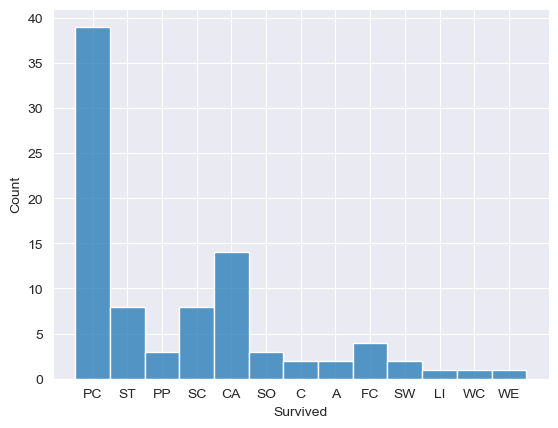

In [195]:
train = df[:ntrain]
survived = train.loc[train['Survived'] == 1]['Ticket_initial2']
dead = train.loc[train['Survived'] == 0]['Ticket_initial2']
df_temp = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
sns.histplot(data=df_temp, x='Survived')

In [196]:
df_temp.iplot(kind='histogram')

In [197]:
df['Ticket_initial2'].isnull().sum()

957

In [198]:
df['Ticket_initial2'] = df['Ticket_initial2'].fillna('UN')

train = df[:ntrain]
survived = train[train['Survived'] == 1]['Ticket_initial2']
dead = train[train['Survived'] == 0]['Ticket_initial2']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

In [199]:
df['Ticket_initial2'] = df['Ticket_initial2'].factorize()[0]

### qcut() 과 cut()
- pandas.qcut(나눌데이터컬럼, q=나눌 수, labels=각그룹이름(배열) 또는 False)
  - 나눌데이터컬럼값의 분포를 기반으로, 균등 사이즈로 각 그룹으로 나눔
- pandas.cut(나눌데이터컬럼, 나눌 수)
  - 나눌데이터컬럼값을 기반으로 동일한 범위로, 각 그룹을 나눔

In [200]:
df['Ticket_Num_Cut'] = df['Ticket_Num'].astype('float')

In [201]:
df['Ticket_Num_Cut'] = pd.qcut(df['Ticket_Num_Cut'], q=10, labels=False)

In [203]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_initial_test,Ticket_initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,U,0,0.0,2,A/5,21171,A,0,3
1,2,1.0,1,1,4.0,PC 17599,3.0,C,1,2.0,2,PC,17599,PC,1,3
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,U,0,1.0,1,STON/O2.,3101282,STONO,2,9
3,4,1.0,1,1,4.0,113803,2.0,C,0,2.0,2,NaN,113803,NaN,3,5
4,5,0.0,3,0,4.0,373450,0.0,U,0,0.0,1,NaN,373450,NaN,3,9


In [204]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)
train = df[:ntrain]
survived = train[train['Survived'] == 1]['Ticket_Num_Cut']
dead = train[train['Survived'] == 0]['Ticket_Num_Cut']
df_temp1 = pd.concat([survived, dead], axis=1, keys=['Survived', 'Dead'])
df_temp1.iplot(kind='histogram')

In [205]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Initial,Family,Ticket_Initial,Ticket_Num,Ticket_initial_test,Ticket_initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,A/5 21171,0.0,U,0,0.0,2,A/5,21171,A,0,3
1,2,1.0,1,1,4.0,PC 17599,3.0,C,1,2.0,2,PC,17599,PC,1,3
2,3,1.0,3,1,3.0,STON/O2. 3101282,0.0,U,0,1.0,1,STON/O2.,3101282,STONO,2,9
3,4,1.0,1,1,4.0,113803,2.0,C,0,2.0,2,NaN,113803,NaN,3,5
4,5,0.0,3,0,4.0,373450,0.0,U,0,0.0,1,NaN,373450,NaN,3,9


In [206]:
drop_features = ['Ticket', 'Ticket_Initial', 'Ticket_initial_test', 'Ticket_Num']
df.drop(drop_features, axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Initial,Family,Ticket_initial2,Ticket_Num_Cut
0,1,0.0,3,0,3.0,0.0,U,0,0.0,2,0,3
1,2,1.0,1,1,4.0,3.0,C,1,2.0,2,1,3
2,3,1.0,3,1,3.0,0.0,U,0,1.0,1,2,9
3,4,1.0,1,1,4.0,2.0,C,0,2.0,2,3,5
4,5,0.0,3,0,4.0,0.0,U,0,0.0,1,3,9


### pickle
- 데이터 구조나 객체등 어떤 데이터도 파일로 저장하고, 읽을 수 있음
- 리스트를 저장하면, 해당 파일을 읽어서, 리스트 변수에 값을 넣을 수 있음

In [207]:
import pickle

#### pickle 사용법1: 파일에 저장된 리스트 데이터 읽어서, datas1 변수에 넣기
- 파일 위치에는 전체 디렉토리와 해당 파일명까지 써주거나,
- 파일명만 써주면, 주피터 노트북이 실행되는 해당 폴더 안에 있는 파일을 의미함

```python
with open(파일위치, 'rb') as pickle_filename:
    datas1 = pickle.load(pickle_filename)
```
#### pickle 사용법2: 파일에 리스트 변수의 데이터를 저장하기

```python
with open(파일위치, 'wb') as pickle_filename:
    pickle.dump(datas1, pickle_filename)
```

In [208]:
with open('titanic_step1_feature_change.pickle', 'wb') as pickle_filename:
    pickle.dump(df, pickle_filename)